In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Emails.csv')

In [ ]:
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
df.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
filename,0
Message-ID,0
content,0
Class,0


In [ ]:
df = df.drop(('Unnamed: 0'), axis = 1)

In [ ]:
df.head()

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
df.shape

(48076, 4)

In [ ]:
df['Class']

,Class
0,Abusive
1,Abusive
2,Abusive
3,Abusive
4,Abusive
...,...
48071,Non Abusive
48072,Non Abusive
48073,Non Abusive
48074,Non Abusive


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer() # Changed 'Stemmer' to 'stemmer'
lemmatizer = WordNetLemmatizer() # Changed 'Lemmatizer' to 'lemmatizer'
stop_word = set(stopwords.words('english')) # Changed 'word' to 'words'

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokenized_text = text.split()
    tokens = [word for word in tokenized_text if word not in stop_word]
    tokens = [stemmer.stem(word) for word in tokens] # Now using 'stemmer'
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # Now using 'lemmatizer'
    return ''.join(tokens)

df['clean_text'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head()

,filename,Message-ID,content,Class,clean_text
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eatshitjohnjlavoratoexcelr111820000101pmjohnar...
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,fuck
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemanfollowchampagnavail70approximretailpr...
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive,sorriivetakenlongjusttrifendchicklifesooooohar...
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,assholjohnjlavoratoexcelr122320001051johnarnol...


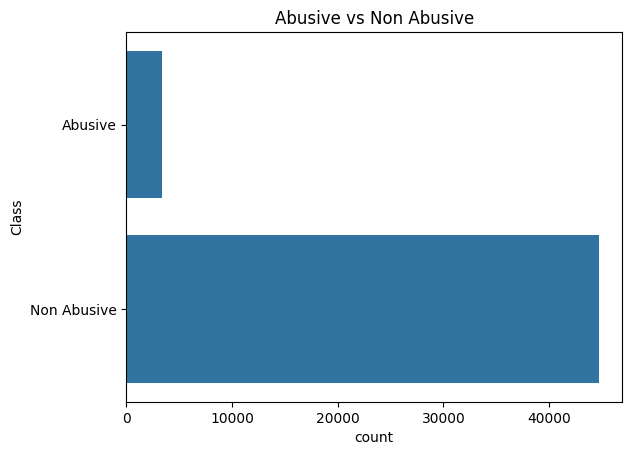

In [ ]:
sns.countplot(df['Class'])
plt.title('Abusive vs Non Abusive')
plt.show()

In [ ]:
print(df['Class'].value_counts())  # Print the counts of each unique value in the 'Class' column

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64


In [ ]:
encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(df[['Class']]).toarray()

# Convert back to DataFrame and concatenate with the original DataFrame
df_encoded = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['Class']))
df = pd.concat([df,df_encoded], axis=1)

df.drop('Class', axis=1, inplace=True)


In [ ]:
df.head()

,filename,Message-ID,content,clean_text,Class_Abusive,Class_Non Abusive
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,eatshitjohnjlavoratoexcelr111820000101pmjohnar...,1.0,0.0
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,fuck,1.0,0.0
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,gentlemanfollowchampagnavail70approximretailpr...,1.0,0.0
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,sorriivetakenlongjusttrifendchicklifesooooohar...,1.0,0.0
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,assholjohnjlavoratoexcelr122320001051johnarnol...,1.0,0.0


In [ ]:
# text convert numerical vectors using tf-idf

vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = vectorizer.fit_transform(x)

In [ ]:
x = x_tfidf
y = np.argmax(df_encoded.values, axis=1)  # Convert one-hot encoding back to single labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:

lcf = LogisticRegression()
lcf.fit(x_train, y_train)
y_pred = lcf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 93.0116472545757


In [ ]:
print(pd.Series(y_pred).value_counts())

1    9462
0     154
Name: count, dtype: int64


In [ ]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       694
           1       0.93      1.00      0.96      8922

    accuracy                           0.93      9616
   macro avg       0.96      0.52      0.51      9616
weighted avg       0.94      0.93      0.90      9616



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

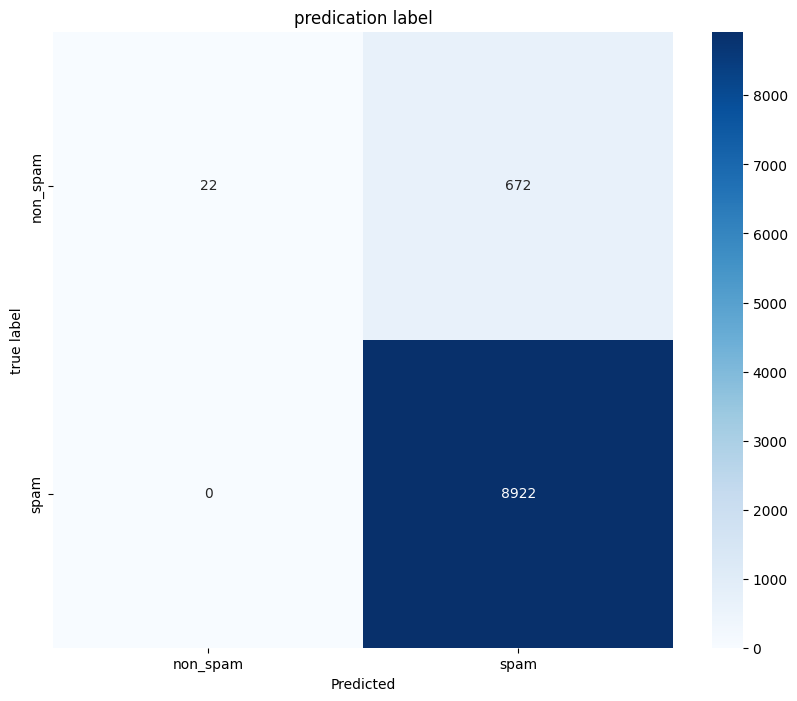

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["non_spam", "spam"], yticklabels=["non_spam", "spam"])
plt.title('predication label')
plt.ylabel('true label')
plt.xlabel('Predicted')
plt.show()

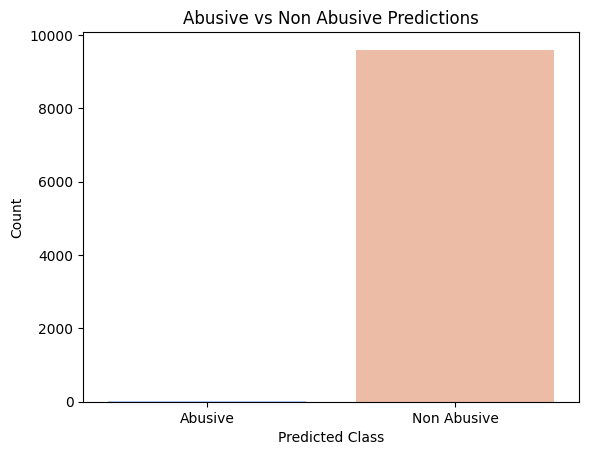

In [ ]:
# Count plot for predicted classes
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Abusive', 'Non Abusive'])
plt.show()


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 95.72587354409318


In [ ]:
print(pd.Series(y_pred).value_counts())

1    9462
0     154
Name: count, dtype: int64


In [ ]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58       694
           1       0.96      1.00      0.98      8922

    accuracy                           0.96      9616
   macro avg       0.98      0.70      0.78      9616
weighted avg       0.96      0.96      0.95      9616



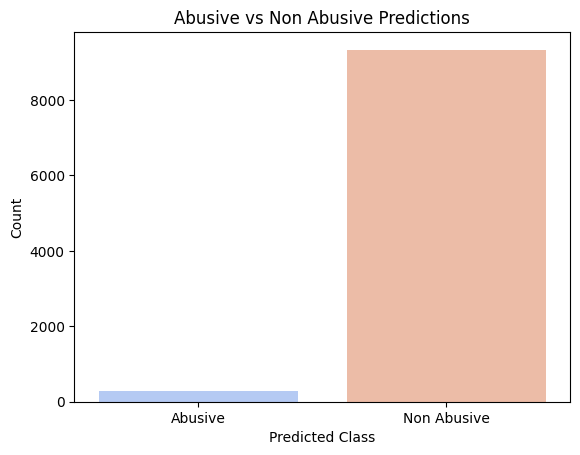

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Abusive', 'Non Abusive'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 95.72587354409318


In [ ]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58       694
           1       0.96      1.00      0.98      8922

    accuracy                           0.96      9616
   macro avg       0.98      0.70      0.78      9616
weighted avg       0.96      0.96      0.95      9616



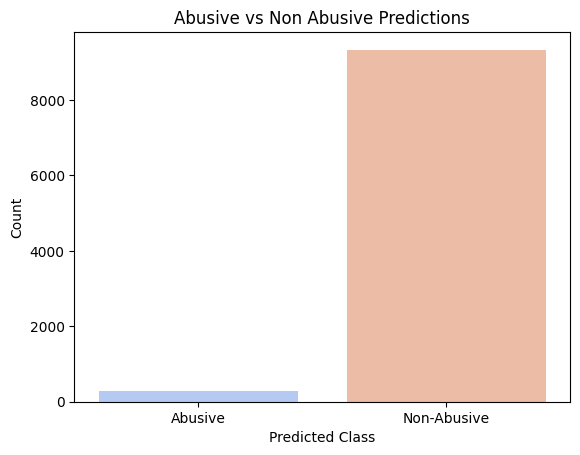

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Abusive', 'Non-Abusive'])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test) # Changed x_text to x_test
acc = accuracy_score(y_test, y_pred)
print('Accurcay_score', acc * 100)

Accurcay_score 95.72587354409318


In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.41      0.58       694
           1       0.96      1.00      0.98      8922

    accuracy                           0.96      9616
   macro avg       0.98      0.70      0.78      9616
weighted avg       0.96      0.96      0.95      9616



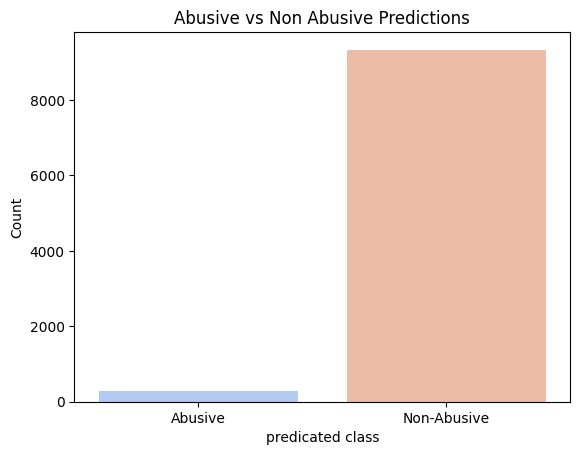

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('predicated class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Abusive', 'Non-Abusive'])
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 92.83485856905158


In [ ]:
print('Classification_report')
print(classification_report(y_test, y_pred))

Classification_report
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       694
           1       0.93      1.00      0.96      8922

    accuracy                           0.93      9616
   macro avg       0.96      0.50      0.49      9616
weighted avg       0.93      0.93      0.89      9616



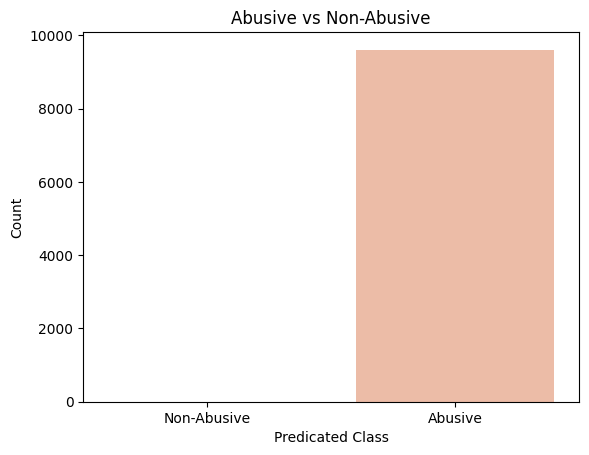

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non-Abusive')
plt.xlabel('Predicated Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels = ['Non-Abusive', 'Abusive'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kne = KNeighborsClassifier()
kne.fit(x_train, y_train)
y_pred = kne.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 94.38435940099833


In [ ]:
print('Classifiation_report')
print(classification_report(y_test, y_pred))

Classifiation_report
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       694
           1       0.94      1.00      0.97      8922

    accuracy                           0.94      9616
   macro avg       0.97      0.61      0.67      9616
weighted avg       0.95      0.94      0.93      9616



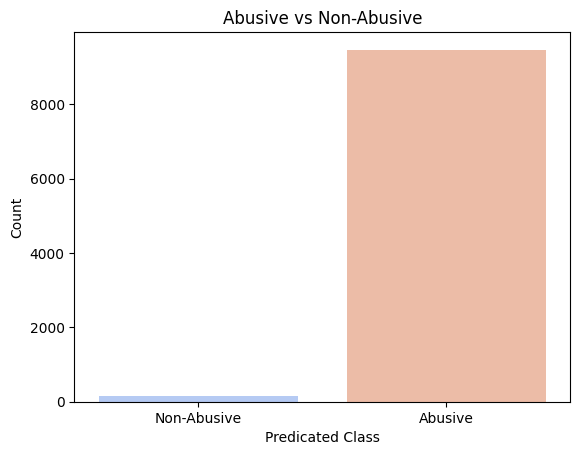

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non-Abusive')
plt.xlabel('Predicated Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels = ['Non-Abusive', 'Abusive'])
plt.show()

In [ ]:
import pickle

In [ ]:
with open('Email.pkl', 'wb') as file:
   pickle.dump(ran, file)